In [18]:
pip install matplotlib textblob scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 3.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data from the csv files
training_data = pd.read_csv('/Users/jazucena/Downloads/EECS448/wine_somMLier-main/cleaned_wine_training_data.csv')

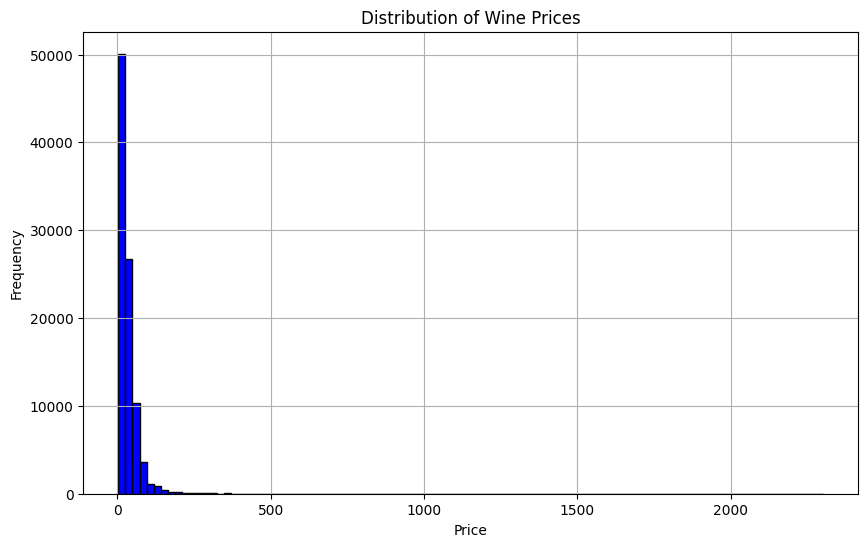

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(training_data['price'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#axis

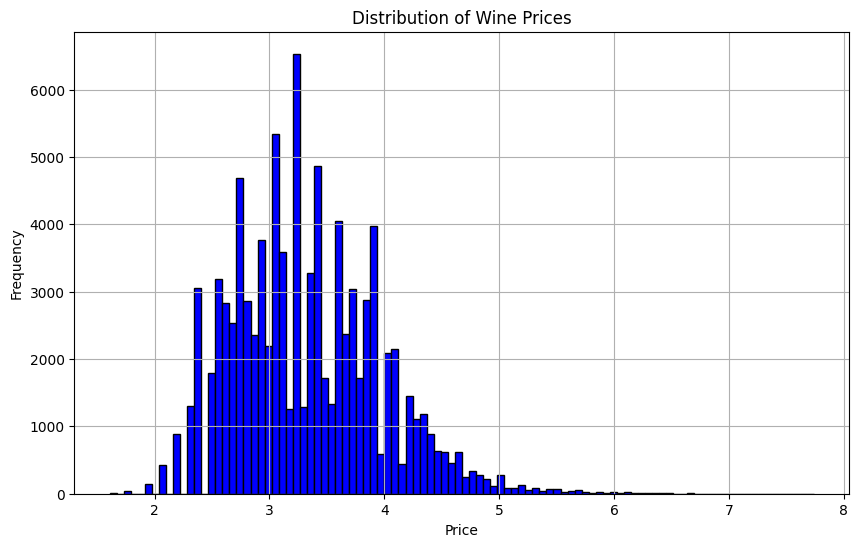

In [6]:
log_prices = np.log(training_data['price'] + 1)  # Adding 1 to avoid log(0)
plt.figure(figsize=(10, 6))
plt.hist(log_prices, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Transformed data: [2.09269276 2.23843814 1.67992629 ... 1.84437062 2.2821245  2.00203235]
Lambda value: -0.2899198074563182


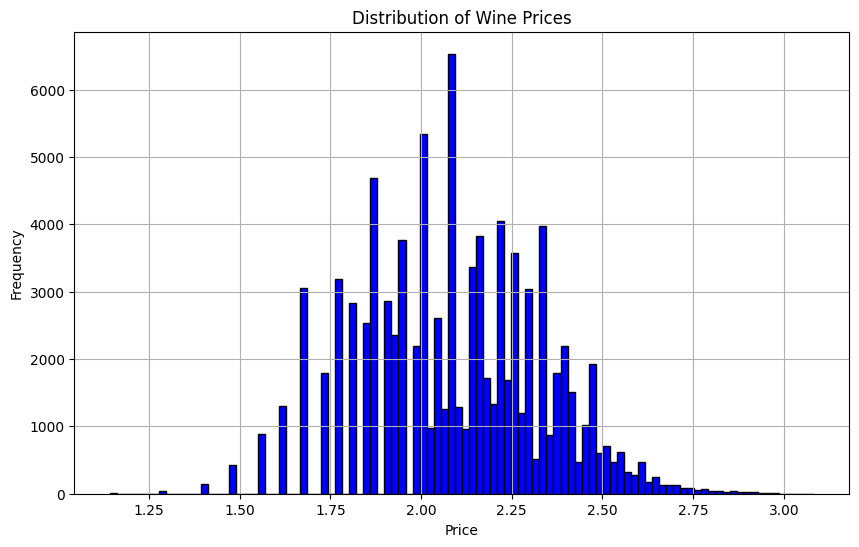

In [44]:
from scipy.stats import boxcox

prices = np.array(training_data['price'])
to_remove = np.where(np.isnan(prices))[0]

cleaned_y = np.delete(prices, to_remove)
cleaned_X = training_data.drop(to_remove)
assert len(cleaned_X) == len(cleaned_y)

transformed_prices, best_lambda = boxcox(cleaned_y)

# Print transformed data and lambda value
print("Transformed data:", transformed_prices)
print("Lambda value:", best_lambda)

plt.figure(figsize=(10, 6))
plt.hist(transformed_prices, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score

# helper function for measuring accuracy within threshold
def accuracy(y_true, y_pred, threshold):
    correct = 0
    total = len(y_true)
    for true, pred in zip(y_true, y_pred):
        if abs(true - pred) <= threshold:
            correct += 1
    return correct / total

# load validation data
data = pd.read_csv("cleaned_wine_validation_data.csv")

# if data is has price column as empty, exclude from data
data = data[data['price'].notnull()]

In [103]:
print("\n---------Linear Regression with Just Description---------")

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['description'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)  # 0.2603
test_r2 = r2_score(y_test, test_preds)  # 0.1681

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

# acc1 = accuracy(y_test, test_preds, threshold=10)
# print("Accuracy within $10:", acc1)

# tp = 0.20
# acc2 = accuracy(y_test, test_preds, threshold=tp * y_test.mean())
# print("Accuracy within 20%:", acc2)


---------Linear Regression with Just Description---------
Train RMSE: 31.319728401623024
Test RMSE: 35.526349174650285
Train R2 Score: 0.26033693714484607
Test R2 Score: 0.1680509349930147


In [105]:
print("\n---------BOX COX Linear Regression with Just Description---------")

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
Xb = tfidf_vectorizer.fit_transform(cleaned_X['description'])

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, transformed_prices, test_size=0.2, random_state=42)

box_model = LinearRegression()
box_model.fit(Xb_train, yb_train)
box_train_preds = box_model.predict(Xb_train)
box_test_preds = box_model.predict(Xb_test)

box_train_rmse = root_mean_squared_error(yb_train, box_train_preds)
box_test_rmse = root_mean_squared_error(yb_test, box_test_preds)
box_train_r2 = r2_score(yb_train, box_train_preds) 
box_test_r2 = r2_score(yb_test, box_test_preds) 

print("Train RMSE:", box_train_rmse)
print("Test RMSE:", box_test_rmse)
print("Train R2 Score:", box_train_r2)
print("Test R2 Score:", box_test_r2)

# hurd = 5
# acc1 = accuracy(yb_test, box_test_preds, threshold=hurd)
# print("Accuracy within $", hurd, ":", acc1)

# tp = 0.10
# acc2 = accuracy(yb_test, box_test_preds, threshold=tp * y_test.mean())
# print("Accuracy within ", tp*100, "%:", acc2)



---------BOX COX Linear Regression with Just Description---------
Train RMSE: 0.16764207705199
Test RMSE: 0.16901538850323633
Train R2 Score: 0.5427916319210955
Test R2 Score: 0.5330258938524761


In [101]:
print("\n----------IN PROGRESS----------")

print("\n----------BOX COX Logistic Regression with Region and Vintage----------")

bins = [0, 5, 20, 50, 100, 300, float('inf')]
labels = ['free', 'very cheap', 'moderate', 'expensive', 'very expensive', 'very fancy']

cleaned_X['price_category'] = pd.cut(transformed_prices, bins=bins, labels=labels, right=False)

cleaned_X['description'] = cleaned_X['description'] + ' ' + \
                      cleaned_X['province'].fillna('') + ' ' + \
                      cleaned_X['region_1'].fillna('') + ' ' + \
                      cleaned_X['region_2'].fillna('') + ' ' + \
                      cleaned_X['year']

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(cleaned_X['description'])
y = cleaned_X['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print(train_preds)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


----------BOX COX Logistic Regression with Region and Vintage----------


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'free'

In [35]:
#Price Anomaly Detection
mean_price = training_data['price'].mean()
sd_price = training_data['price'].std()
hurdle_rate = 3
hurdle = mean_price + hurdle_rate*sd_price

print("Mean Price: ", mean_price)
print("Standard Deviation: ", sd_price)
print("Hurdle: ", hurdle)

#price is skewed right -> log? 
price_anomalies = training_data[training_data['price'] > hurdle]
print("Number of wines greater than ", hurdle_rate, " standard deviations from the mean: ", price_anomalies.size)

print("Price anomalies:")
print(price_anomalies[['title', 'price']])


Mean Price:  34.564780128559875
Standard Deviation:  37.45773458078617
Hurdle:  146.9379838709184
Number of wines greater than  3  standard deviations from the mean:  19788
Price anomalies:
                                                    title  price
12      Volpaia 2007 Il Puro Casanova  (Chianti Classico)  158.0
85      Jean-Luc and Paul Aegerter 2014  Corton Vergennes  170.0
91              Viñedos de Paganos 2012 La Nieta  (Rioja)  149.0
95      Castell 2006 Casteller Schlossberg Beerenausle...  169.0
108                                                   NaN  283.0
...                                                   ...    ...
101521                                                NaN  253.0
101562  Geh. Rat Dr. von Bassermann-Jordan 2008 Deides...  245.0
101589            Gaja 2007 Sorì Tildìn Nebbiolo (Langhe)  440.0
101617  Grgich Hills 2010 Yountville Selection Estate ...  195.0
101652               Louis Latour 2014  Bâtard-Montrachet  430.0

[1164 rows x 2 columns]


In [109]:
from textblob import TextBlob

def calc_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

sentiment_scores = training_data['description'].apply(calc_sentiment_score)
# hurdle_score = sentiment_scores.mean() + 0.5  # You can adjust this threshold as needed
hurdle_score = 0.9

positive_anomalies = training_data[sentiment_scores > hurdle_score]
negative_anomalies = training_data[sentiment_scores < hurdle_score]

print("Positive Sentiment Anomalies:")
print(positive_anomalies['description'])
print("Sentiment Scores:")
print(sentiment_scores[positive_anomalies.index])
print("\nNegative Sentiment Anomalies:")
print(negative_anomalies['description'])
print("Sentiment Scores:")
print(sentiment_scores[negative_anomalies.index])

Positive Sentiment Anomalies:
5191      syrah best script  offering showing sharptoned...
9328      anchored fig plum berry fruit substantial effo...
11466     dubrul vineyard best known bordeaux variety sy...
13057     cabernet franc merlot petit verdot syrah blend...
13913     load toasted note vanilla cherry leather almon...
16946     canoe ridge vineyard warmer winery two singlev...
18199     wine beautifully rendered pear melon backed hi...
19403     tannicly dense s estate sonoma coast bottling ...
20702     wine impressive fullbodied approach variety al...
24812     produced organic grape wine ripe packed fruit ...
25965     savory spice roasted meat aroma lead flavor to...
26538     touch coconut cream accent darkfruited bouquet...
30594     tart beautifullydefined mix apple pear fruit s...
31154     gaseous rubberysmelling start catalonian blend...
32492     toast bosc pear spice lee flower aroma followe...
33223     wine entices nuanced aroma mineral spice almon...
34004     